#### This file contains : plot one sample picture of each augmentation method

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
path = "/content/drive/MyDrive/EE541_project/"

In [ ]:
import h5py
import numpy as np
import os
import copy
from PIL import Image
import glob
import torch
from torchvision import transforms
from matplotlib import pyplot as plt
from skimage.util import random_noise

In [ ]:
data_hdf5_root = os.path.join(path, "data/asl/data.hdf5")

In [ ]:
with h5py.File(data_hdf5_root, 'r') as hf:
    test = hf['test'][:]

In [ ]:
class gaussian_noise():
    def __init__(self, mean, stddev):
       self.mean = mean
       self.stddev = stddev
    def __call__(self, img):
       gauss_img = random_noise(img, mode='gaussian', mean=self.mean, var=self.stddev, clip=True)
       return torch.tensor(gauss_img, dtype=torch.float32)
       
class salt_pepper_noise():
    def __init__(self, amount):
      self.amount = amount
    def __call__(self, img):
       sp_img = random_noise(img, mode='s&p', amount=self.amount)
       return torch.tensor(sp_img, dtype=torch.float32)

In [ ]:
Normalization = transforms.Compose([
                            transforms.ToTensor(), 
                            transforms.Normalize((0.5190, 0.4993, 0.5141),(0.2280, 0.2555, 0.2637))])
HorizontalFlip = transforms.Compose([transforms.ToTensor(), transforms.RandomHorizontalFlip(p=1)])
GaussianNoise = transforms.Compose([transforms.ToTensor(), transforms.RandomApply(transforms=[gaussian_noise(0, 0.35)], p=1)])
SaltPepperNoise = transforms.Compose([transforms.ToTensor(),transforms.RandomApply(transforms=[salt_pepper_noise(0.35)], p=1)])
Rotation = transforms.Compose([transforms.ToTensor(), transforms.RandomRotation(10)])
Gray = transforms.Compose([transforms.ToTensor(), transforms.RandomGrayscale(1)])

aug_list = [Normalization, HorizontalFlip, GaussianNoise, SaltPepperNoise, Rotation, Gray]

In [ ]:
def plot_augs(original_image, rows, cols, augmentation, titles, normalize=False):
    fig = plt.figure(figsize=(10, 6))

    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        image = augmentation[i](original_image)
        if normalize:
            image_min = image.min()
            image_max = image.max()
            image.clamp_(min=image_min, max=image_max)
            image.add_(-image_min).div_(image_max - image_min + 1e-5)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        ax.set_title(titles[i])
        ax.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


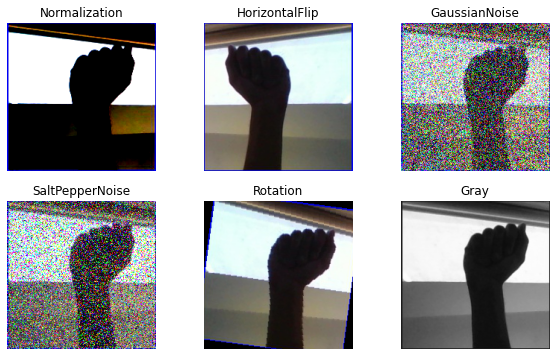

In [ ]:
titles = ["Normalization","HorizontalFlip", "GaussianNoise", "SaltPepperNoise", "Rotation", "Gray"]
plot_augs(test[0], 2, 3, aug_list, titles)

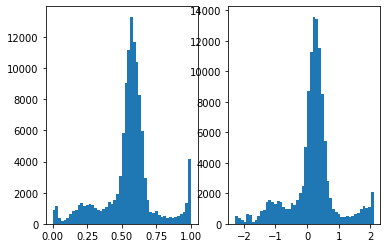

In [ ]:
normal_transforms = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize((0.5190, 0.4992, 0.5139),
                                                         (0.2283, 0.2557, 0.2639))
                                    ])
tt = transforms.ToTensor()
img = tt(test[0])
img_normal = normal_transforms(test[0])
img = img.numpy()
img_normal = img_normal.numpy()

fig, axs = plt.subplots(1, 2)
axs[0].hist(img.flatten(), 50)
axs[1].hist(img_normal.flatten(), 50)
plt.show()